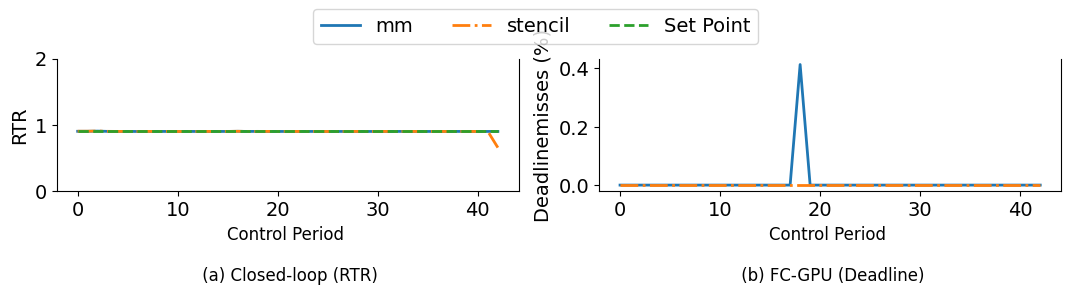

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Helper function to read data from a text file and convert to a list of floats
def read_data(file_path):
    with open(file_path, 'r') as f:
        return [float(line.strip()) for line in f.readlines()]

# -------------------- Read Data --------------------
closed_s1 = read_data('logs/s11.txt')
closed_s2 = read_data('logs/s22.txt')
setpoint1_closed = [0.90] * len(closed_s1)

closed_p1 = read_data('logs/deadlinemisst1.txt')
closed_p2 = read_data('logs/deadlinemisst2.txt')

# -------------------- Define x-axis indices --------------------
idx_rtr = slice(5, 50)

# -------------------- Create 1x2 Subplots --------------------
fig, axs = plt.subplots(1, 2, figsize=(11, 3), sharex=False)

# Subplot 0: Closed-Loop RTR
axs[0].plot(closed_s1[idx_rtr], '-', linewidth=2, label='mm')
axs[0].plot(closed_s2[idx_rtr], '-.', linewidth=2, label='stencil')
axs[0].plot(np.array(setpoint1_closed)[idx_rtr], '--', linewidth=2, label='Set Point')
axs[0].set_ylabel('RTR', fontsize=14)
axs[0].set_xlabel('Control Period \n \n (a) Closed-loop (RTR)', fontsize=12)
axs[0].set_ylim([0, 2])
axs[0].spines['top'].set_visible(False)

# Subplot 1: Closed-Loop Period
axs[1].plot(closed_p1[idx_rtr], '-', linewidth=2, label='mm')
axs[1].plot(closed_p2[idx_rtr], '-.', linewidth=2, label='stencil')
axs[1].set_ylabel('Deadlinemisses (%)', fontsize=14)
axs[1].set_xlabel('Control Period \n \n (b) FC-GPU (Deadline)', fontsize=12)
axs[1].spines['top'].set_visible(False)

for ax in axs:
    ax.tick_params(axis='both', labelsize=14)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, frameon=True, fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.88])
fig.savefig('Figures/FC-GPU.pdf', bbox_inches='tight', dpi=300, format='pdf')